In [ ]:
from utils.helper import verify


In [ ]:
from utils.helper import verify
from keras_facenet import FaceNet

embedder = FaceNet()


In [ ]:
from PIL import Image


In [ ]:
img=Image.open("./images/andrew/andrew.jpg")
verify(img,"andrew",embedder)

In [33]:
from ultralytics import YOLO
from PIL import Image
import cv2

tflite_model = YOLO('./faceDetectionModel/best_float32.tflite',task='detect')


In [ ]:
tflite_model = YOLO('./faceDetectionModel/best_float32.tflite',task='detect')
img=Image.open("./IMG_2731.jpg")
results = tflite_model(img)
# Assuming you have the image as a NumPy array and a list of results as described
cropped_images = []
for result in results:
    boxes = result.boxes.cpu().numpy()  # Get bounding boxes as NumPy array
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Extract coordinates as integers
        cropped_box = (x1, y1, x2, y2)
        # Crop the image
        cropped_img = img.crop(cropped_box) # Crop the image using the bounding box coordinates
    
        cropped_images.append(cropped_img)



In [2]:

# Run inference


Loading faceDetectionModel\best_float32.tflite for TensorFlow Lite inference...

0: 640x640 4 faces, 705.1ms
Speed: 30.8ms preprocess, 705.1ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)


In [36]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='result1.jpg')  # save to disk

In [23]:
for result in results:
    boxes = result.boxes.cpu().numpy()  # Get bounding boxes as NumPy array
    for box in boxes:
        print(box.xyxy[0])
        break
        # x1, y1, x2, y2 = box  # Extract coordinates as integers
        # cropped_img = img[y1:y2, x1:x2]  # Crop the image using the bounding box coordinates
        # cropped_images.append(cropped_img)

[     315.33      664.76      592.96       978.9]


In [37]:



# Optionally, save the cropped images to disk:
for i, cropped_img in enumerate(cropped_images):
    cv2.imwrite(f"cropped_image_{i}.jpg", cropped_img)  # Change the filename format as needed


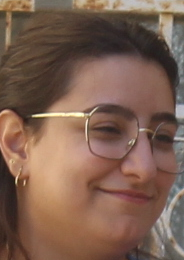

In [42]:
cropped_images[3]